In [1]:
# Import packages
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 200

import warnings
warnings.filterwarnings('ignore')

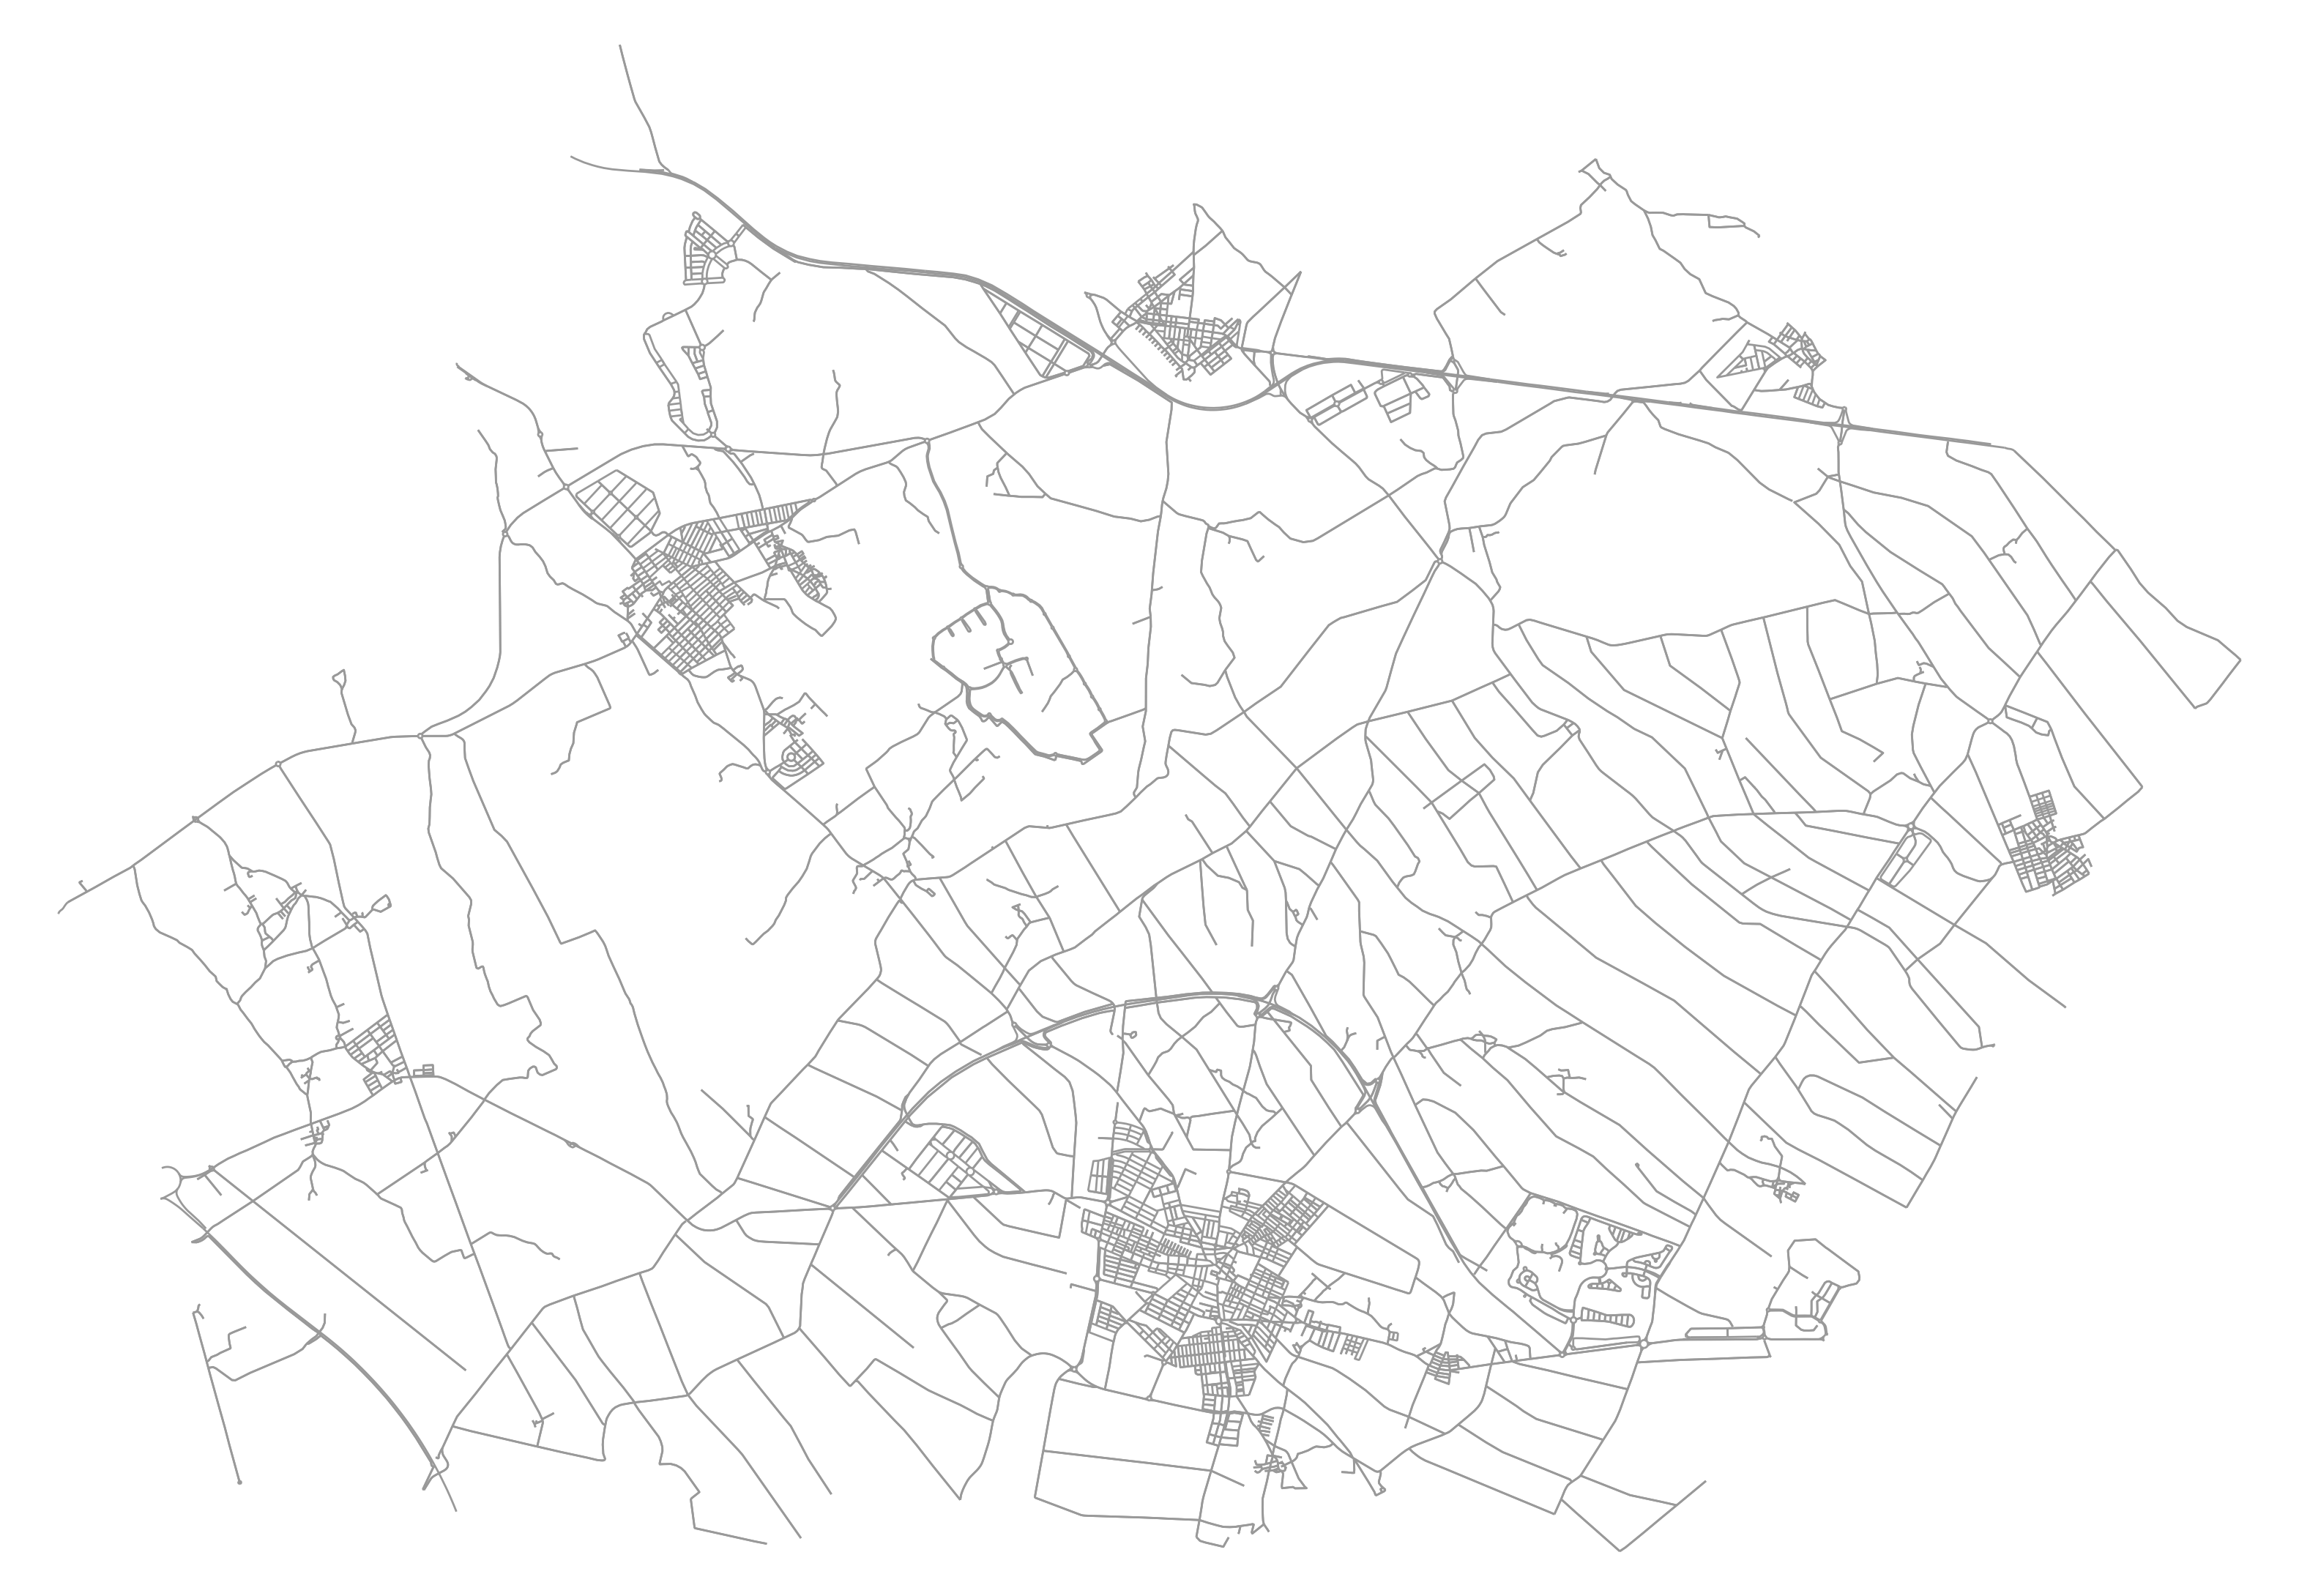

In [2]:
# Download/model a street network for some city, then visualize it
place_name = 'Torre Pacheco, Campo de Cartagena y Mar Menor, España'
G = ox.graph_from_place(place_name, network_type='drive')
fig, ax = ox.plot_graph(G, figsize=(20,20), bgcolor='#FFFFFF', node_color='black', node_size=0)

In [3]:
# Displaying the 3rd node 
list(G.nodes(data=True))[2]

(183510380,
 {'y': 37.8133584,
  'x': -0.9583797,
  'ref': '15',
  'highway': 'motorway_junction',
  'street_count': 3})

In [4]:
# Displaying the 1st edge
list(G.edges(data=True))[1]

(183510277,
 1473199330,
 {'osmid': 204791776,
  'oneway': True,
  'lanes': '2',
  'ref': 'RM-19',
  'highway': 'trunk',
  'maxspeed': '100',
  'length': 518.892,
  'geometry': <shapely.geometry.linestring.LineString at 0x1e216ad4a08>})

In [5]:
# Add edge speeds (km per hour) to graph
G = ox.add_edge_speeds(G)

# Calculate travel time (seconds) for all edges
G = ox.add_edge_travel_times(G)

def shortest_distance(G, orig, dest):
    w = 'travel_time'
    # Get the nearest nodes to the locations
    node_orig = ox.nearest_nodes(G, orig[1], orig[0])
    node_dest = ox.nearest_nodes(G, dest[1], dest[0])
    # Finding the optimal path
    route = ox.shortest_path(G, node_orig, node_dest, weight=w)
    return route

In [6]:
# See mean speed/time values by road type
edges = ox.graph_to_gdfs(G, nodes=False)
edges['highway'] = edges['highway'].astype(str)
edges.groupby('highway')[['length', 'speed_kph', 'travel_time']].mean().round(1)

,length,speed_kph,travel_time
highway,,,
"['living_street', 'residential']",189.3,33.3,20.5
"['unclassified', 'residential']",408.4,34.4,43.2
"['unclassified', 'secondary']",727.9,33.8,77.5
living_street,65.7,33.3,7.1
motorway,3401.1,120.0,102.0
motorway_link,462.2,56.7,29.4
primary,155.7,63.8,8.8
primary_link,83.2,56.7,5.3
residential,68.1,36.5,6.7


In [7]:
# Define origin and desination locations

# Estación de Balsicas-Mar Menor, Balsicas, municipio de Torre-Pacheco
orig_latlon = (37.8188005, -0.950939)

# Biblioteca de Torre-Pacheco, Torre-Pacheco, municipio de Torre-Pacheco
dest_latlon = (37.7428443, -0.959992675950424)

shortest_route = shortest_distance(G, orig_latlon, dest_latlon)

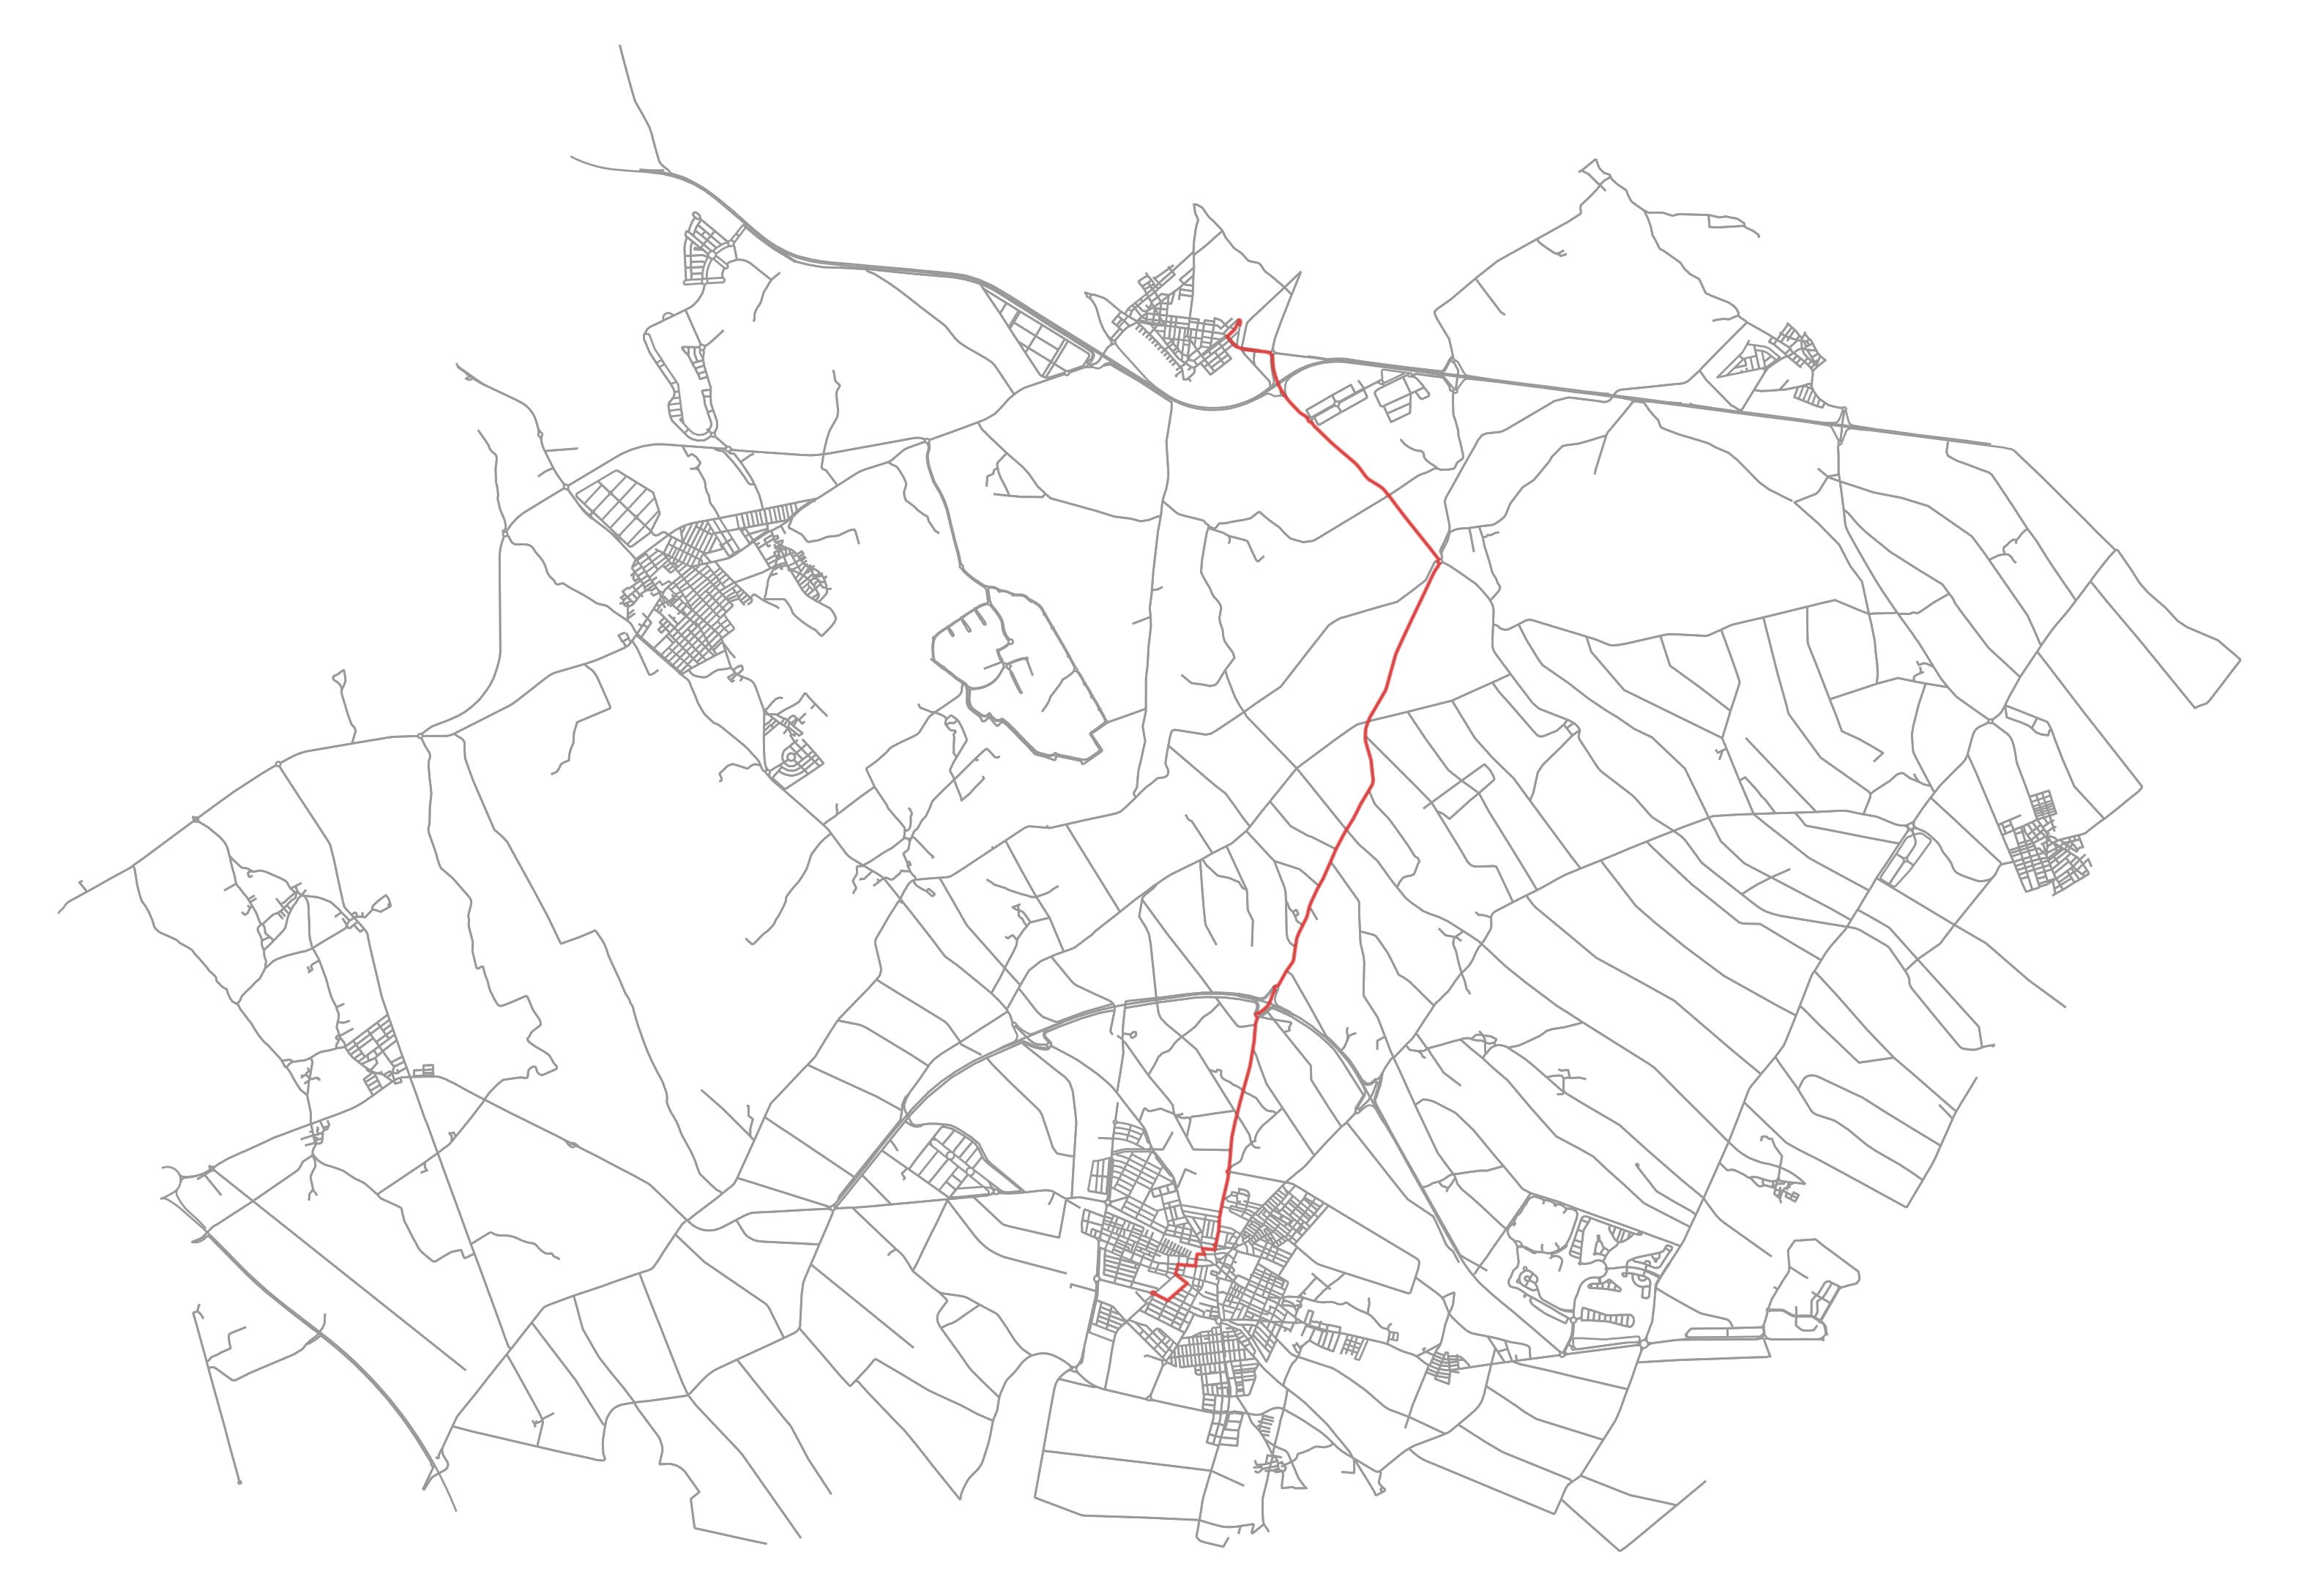

In [8]:
# Plot the path on the map
fig, ax = ox.plot_graph_route(G, shortest_route, route_color='#FF0000', route_linewidth=2,
                              orig_dest_size=0, figsize=(20,20), bgcolor='#FFFFFF', node_size=0)

In [9]:
# Calculate the distance and time of the route
route_length = int(sum(ox.utils_graph.get_route_edge_attributes(G, shortest_route, 'length')))
route_time = int(sum(ox.utils_graph.get_route_edge_attributes(G, shortest_route, 'travel_time')))
print(f'The route is {route_length / 1000:.2f} kilometres long and takes {route_time / 60:.2f} minutes.')

The route is 10.77 kilometres long and takes 11.15 minutes.
